Example of post selection issue.

In [1]:
# set up Python
import logging
from typing import Iterable
from itertools import chain, combinations
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from wvu.util import plot_roc, threshold_plot
from plotnine import *

# quiet down Stan
logger = logging.getLogger("cmdstanpy")
logger.addHandler(logging.NullHandler())

In [2]:
rng = np.random.default_rng(2024)

In [3]:

# https://stackoverflow.com/a/1482316
def powerset(iterable: Iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [4]:
d = pd.read_csv("d_large.csv")


d.head(10)

,x1,x2,y,presentation_group,sampled_positive
0,1.038658,0.008663,1,1,False
1,0.055176,0.827693,1,1,False
2,-0.183270,1.003654,1,1,True
3,1.048862,-0.208270,0,1,False
4,-0.130628,0.094156,0,1,False
5,0.160929,1.010826,1,2,False
6,1.303975,1.215936,0,2,False
7,0.042954,1.022167,1,2,True
8,0.091246,-0.090051,0,2,False
9,-0.113365,-0.041305,0,2,False


In [5]:
d.shape

(1000000, 5)

In [6]:
d_sampled = d.reset_index(drop=True, inplace=False)   # copy
d_sampled.loc[d_sampled['sampled_positive'] == False, 'y'] = 0
# d_sampled = d.loc[(d['sampled_positive'] == True) | (d['y'] == 0), :].reset_index(drop=True, inplace=False) 

Simple model on all selections.

In [7]:
model_all = LogisticRegression()
model_all.fit(d.loc[:, ['x1', 'x2']], d['y'])
d['logistic_all_predict'] = model_all.predict_proba(d.loc[:, ['x1', 'x2']])[:, 1]
(model_all.intercept_[0], model_all.coef_[0])

(-0.5147544847937952, array([0.09163074, 1.37098082]))

In [8]:
model_sampled = LogisticRegression()
model_sampled.fit(d_sampled.loc[:, ['x1', 'x2']], d_sampled['y'])
d['logistic_sample_predict'] = model_sampled.predict_proba(d.loc[:, ['x1', 'x2']])[:, 1]
(model_sampled.intercept_[0], model_sampled.coef_[0])

(-2.014862425821155, array([-1.09675556,  2.01399786]))

In [9]:
d.head()

,x1,x2,y,presentation_group,sampled_positive,logistic_all_predict,logistic_sample_predict
0,1.038658,0.008663,1,1,False,0.399463,0.041624
1,0.055176,0.827693,1,1,False,0.651367,0.399295
2,-0.183270,1.003654,1,1,True,0.699400,0.551689
3,1.048862,-0.208270,0,1,False,0.330886,0.026997
4,-0.130628,0.094156,0,1,False,0.401880,0.156836


<Figure size 640x480 with 0 Axes>

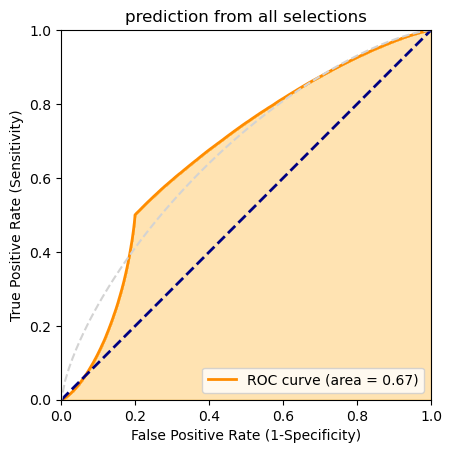

0.6684447419930899

In [10]:
plot_roc(
    prediction=d["logistic_all_predict"],
    istrue=d["y"],
    ideal_line_color="lightgrey",
    title="prediction from all selections",
)

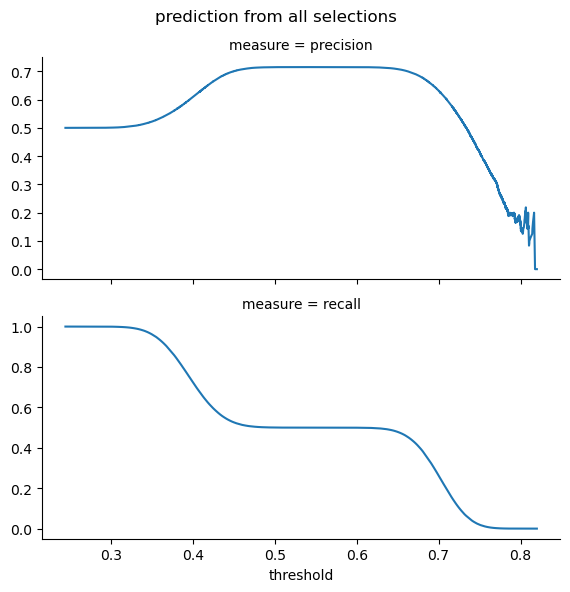

In [11]:
threshold_plot(
    d,
    pred_var="logistic_all_predict",
    truth_var="y",
    title="prediction from all selections",
)

<Figure size 640x480 with 0 Axes>

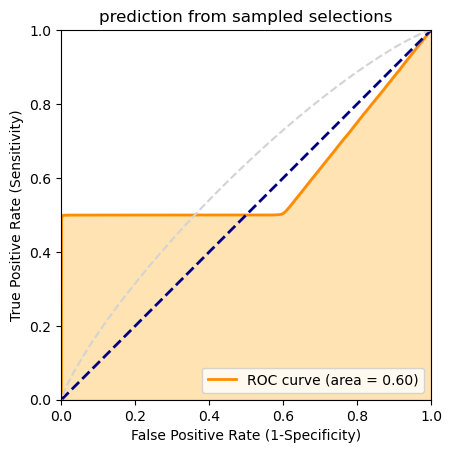

0.5998547831960729

In [12]:
plot_roc(
    prediction=d["logistic_sample_predict"],
    istrue=d["y"],
    ideal_line_color="lightgrey",
    title="prediction from sampled selections",
)

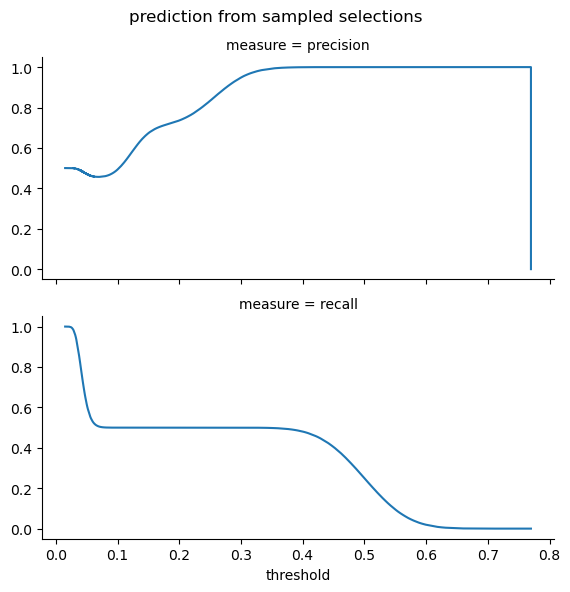

In [13]:
threshold_plot(
    d,
    pred_var="logistic_sample_predict",
    truth_var="y",
    title="prediction from sampled selections",
)